# 🔬 Results Analysis

In [16]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ternary

from src import utils

In [2]:
# Read the dataframes
recog_div_df = pd.read_csv("reports\\diversity_recognizability_results.csv")
model_perf_df = pd.read_csv("reports\\model_performance_results.csv")

In [3]:
# Merge the dataframes on 'data_blend'
merged_df = pd.merge(recog_div_df, model_perf_df, on='data_blend')
merged_df.head()

,data_blend,map50,map50-95,total_variance,test_map50,test_map50-95
0,baseline,0.873224,0.634124,40.258488,0.545991,0.269745
1,26-27-23-24,0.437686,0.278270,115.928703,0.460476,0.197061
2,0-56-22-21,0.291516,0.167160,146.739349,0.207614,0.069898
3,0-27-73-0,0.344920,0.209177,152.292313,0.227972,0.081205
4,27-0-0-73,0.478540,0.288674,96.323662,0.543851,0.226098


In [11]:
# Split data_blend into four columns
merged_df.loc[merged_df["data_blend"] == "baseline", "data_blend"] = "100-0-0-0"
merged_df[['authentic_pct', '3d_model_pct', 'clipart_pct', 'genai_pct']] = merged_df['data_blend'].str.split('-', expand=True)
merged_df.head()

,data_blend,map50,map50-95,total_variance,test_map50,test_map50-95,authentic_pct,3d_model_pct,clipart_pct,genai_pct
0,100-0-0-0,0.873224,0.634124,40.258488,0.545991,0.269745,100,0,0,0
1,26-27-23-24,0.437686,0.278270,115.928703,0.460476,0.197061,26,27,23,24
2,0-56-22-21,0.291516,0.167160,146.739349,0.207614,0.069898,0,56,22,21
3,0-27-73-0,0.344920,0.209177,152.292313,0.227972,0.081205,0,27,73,0
4,27-0-0-73,0.478540,0.288674,96.323662,0.543851,0.226098,27,0,0,73


In [12]:
# Normalize the percentage columns
percentage_cols = ['authentic_pct', '3d_model_pct', 'clipart_pct', 'genai_pct']
for col in percentage_cols:
    merged_df[col] = pd.to_numeric(merged_df[col]) / 100.0

In [14]:
# Project percentages onto 3-variable barycentric plot
merged_df.loc[merged_df["authentic_pct"] == 0, "3d_model_ternary"] = merged_df["3d_model_pct"]
merged_df.loc[merged_df["authentic_pct"] == 0, "clipart_ternary"] = merged_df["clipart_pct"]
merged_df.loc[merged_df["authentic_pct"] == 0, "genai_ternary"] = merged_df["genai_pct"]
merged_df.head()

,data_blend,map50,map50-95,total_variance,test_map50,test_map50-95,authentic_pct,3d_model_pct,clipart_pct,genai_pct,3d_model_ternary,clipart_ternary,genai_ternary
0,100-0-0-0,0.873224,0.634124,40.258488,0.545991,0.269745,1.00,0.00,0.00,0.00,NaN,NaN,NaN
1,26-27-23-24,0.437686,0.278270,115.928703,0.460476,0.197061,0.26,0.27,0.23,0.24,NaN,NaN,NaN
2,0-56-22-21,0.291516,0.167160,146.739349,0.207614,0.069898,0.00,0.56,0.22,0.21,0.56,0.22,0.21
3,0-27-73-0,0.344920,0.209177,152.292313,0.227972,0.081205,0.00,0.27,0.73,0.00,0.27,0.73,0.00
4,27-0-0-73,0.478540,0.288674,96.323662,0.543851,0.226098,0.27,0.00,0.00,0.73,NaN,NaN,NaN


In [15]:
merged_df.loc[merged_df["authentic_pct"] != 0, "3d_model_ternary"] = merged_df["3d_model_pct"] / (merged_df["3d_model_pct"] + merged_df["clipart_pct"] + merged_df["genai_pct"])
merged_df.loc[merged_df["authentic_pct"] != 0, "clipart_ternary"] = merged_df["clipart_pct"] / (merged_df["3d_model_pct"] + merged_df["clipart_pct"] + merged_df["genai_pct"])
merged_df.loc[merged_df["authentic_pct"] != 0, "genai_ternary"] = merged_df["genai_pct"] / (merged_df["3d_model_pct"] + merged_df["clipart_pct"] + merged_df["genai_pct"])
merged_df.head()

,data_blend,map50,map50-95,total_variance,test_map50,test_map50-95,authentic_pct,3d_model_pct,clipart_pct,genai_pct,3d_model_ternary,clipart_ternary,genai_ternary
0,100-0-0-0,0.873224,0.634124,40.258488,0.545991,0.269745,1.00,0.00,0.00,0.00,NaN,NaN,NaN
1,26-27-23-24,0.437686,0.278270,115.928703,0.460476,0.197061,0.26,0.27,0.23,0.24,0.364865,0.310811,0.324324
2,0-56-22-21,0.291516,0.167160,146.739349,0.207614,0.069898,0.00,0.56,0.22,0.21,0.560000,0.220000,0.210000
3,0-27-73-0,0.344920,0.209177,152.292313,0.227972,0.081205,0.00,0.27,0.73,0.00,0.270000,0.730000,0.000000
4,27-0-0-73,0.478540,0.288674,96.323662,0.543851,0.226098,0.27,0.00,0.00,0.73,0.000000,0.000000,1.000000


In [4]:
%matplotlib inline

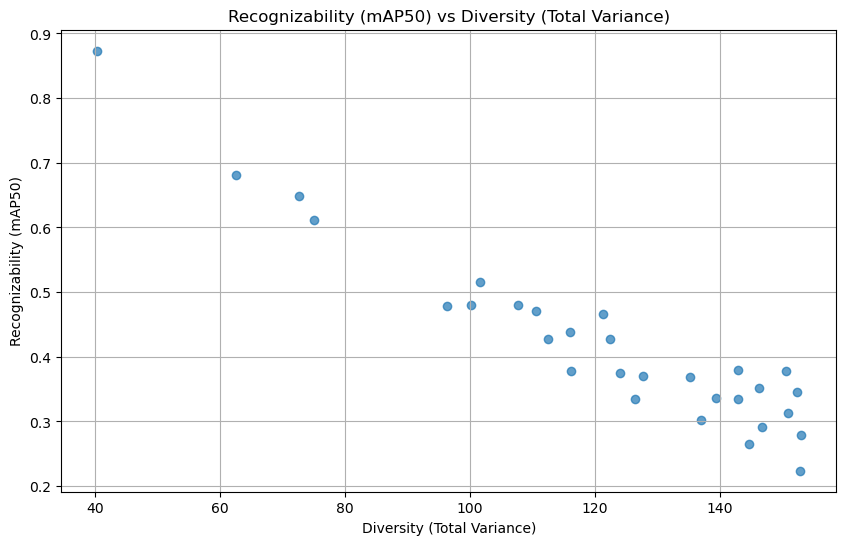

In [5]:
# Plot map50 vs total variance
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["total_variance"], merged_df["map50"], alpha=0.7)
plt.title("Recognizability (mAP50) vs Diversity (Total Variance)")
plt.xlabel("Diversity (Total Variance)")
plt.ylabel("Recognizability (mAP50)")
plt.grid()
plt.show()

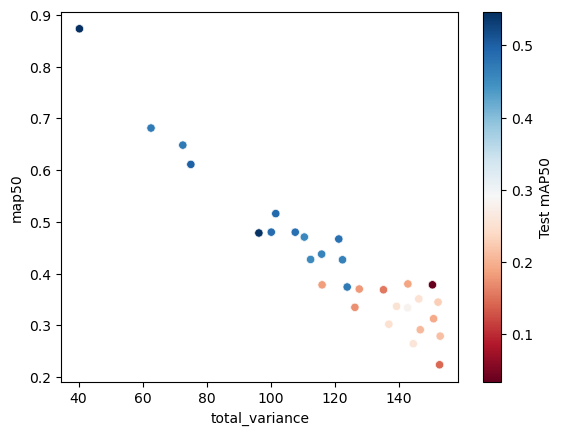

In [10]:

ax = sns.scatterplot(data=merged_df, x="total_variance", y="map50", hue="test_map50", palette="RdBu")

norm = plt.Normalize(merged_df["test_map50"].min(), merged_df["test_map50"].max())

sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

ax.get_legend().remove()
ax.figure.colorbar(sm, ax=ax, label="Test mAP50")


plt.show()

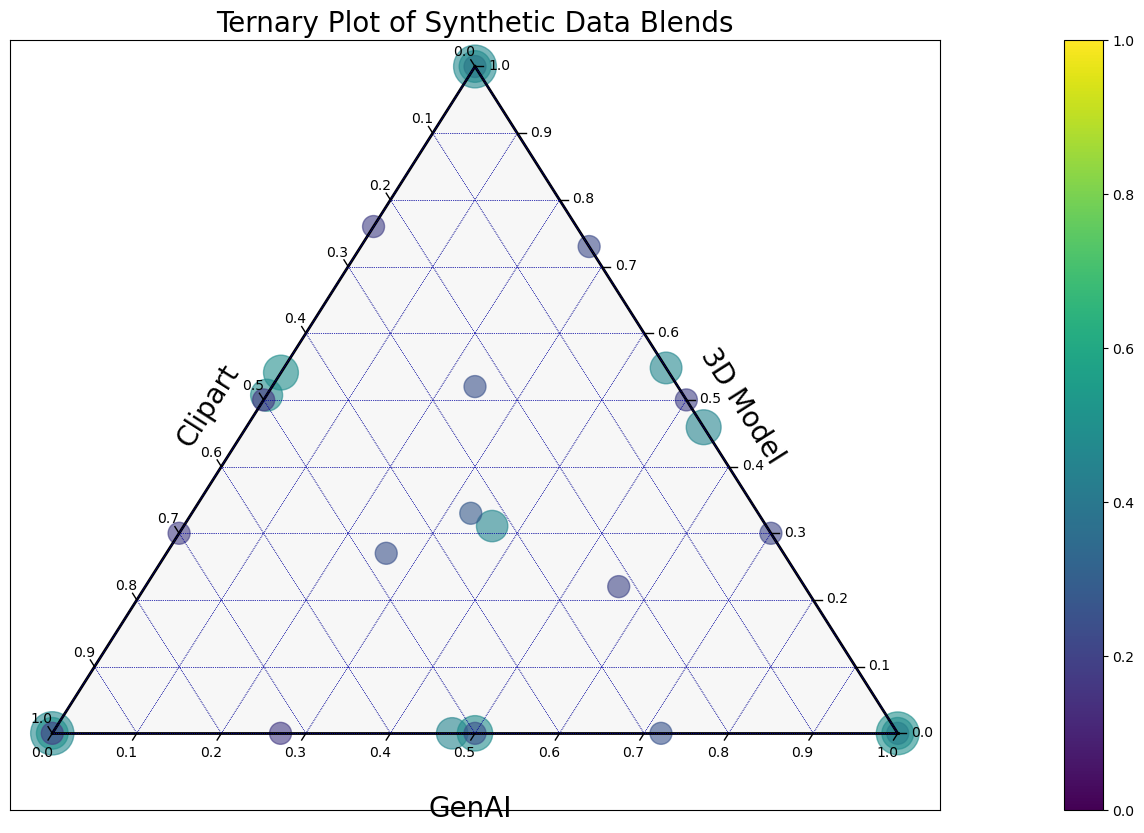

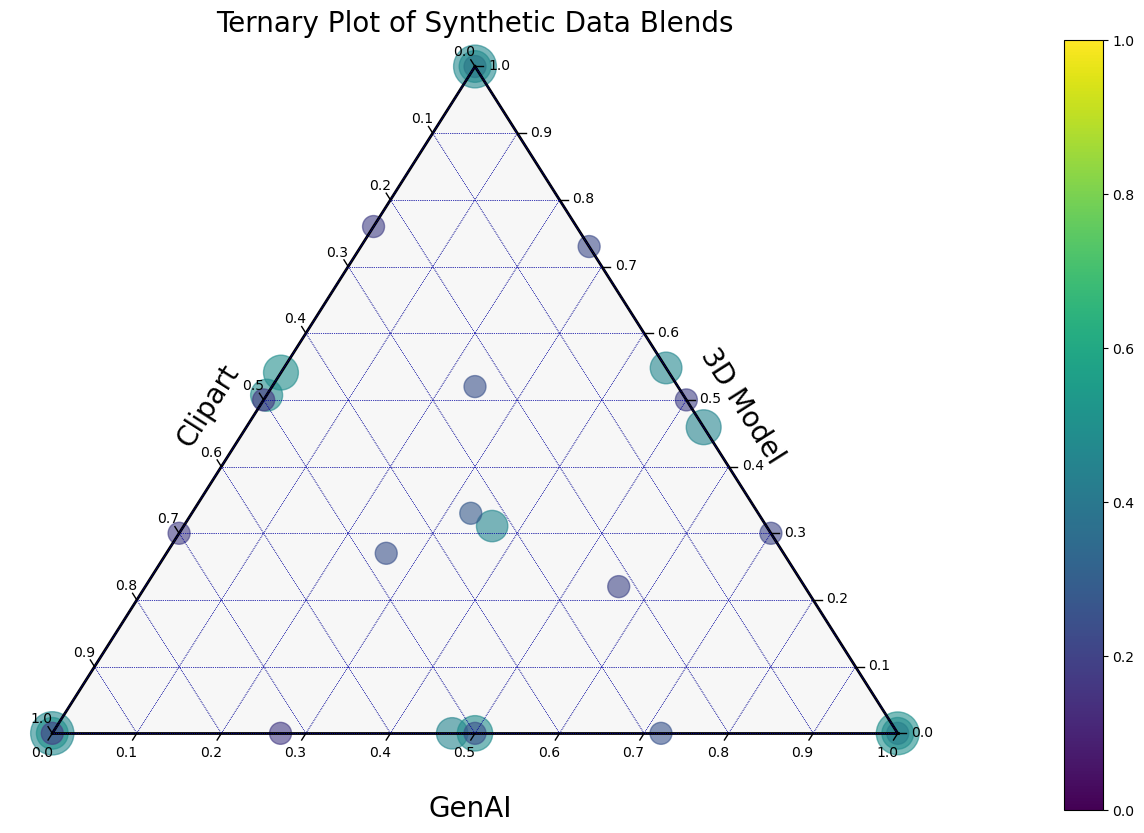

In [54]:
# Boundary and gridlines
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(16, 10)

# Draw boundary and gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="black")
tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)

# Set axis labels and title
fontsize = 20
tax.set_title("Ternary Plot of Synthetic Data Blends", fontsize=fontsize)
tax.left_axis_label("Clipart", fontsize=fontsize)
tax.right_axis_label("3D Model", fontsize=fontsize)
tax.bottom_axis_label("GenAI", fontsize=fontsize)

# Set ticks
tax.ticks(axis="lbr", linewidth=1, multiple=0.1, tick_formats="%.1f", fontsize=10)

points = merged_df[["3d_model_ternary", "clipart_ternary", "genai_ternary"]].values
tax.scatter(points, marker='o', c=merged_df["test_map50"], cmap="viridis", s=1000 * (0.25 + merged_df["authentic_pct"]), alpha=0.6)

cb = plt.colorbar(plt.cm.ScalarMappable(cmap="viridis"), ax=tax.get_axes(), orientation="vertical", pad=0.1)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().spines[:].set_visible(False)

ternary.plt.show()

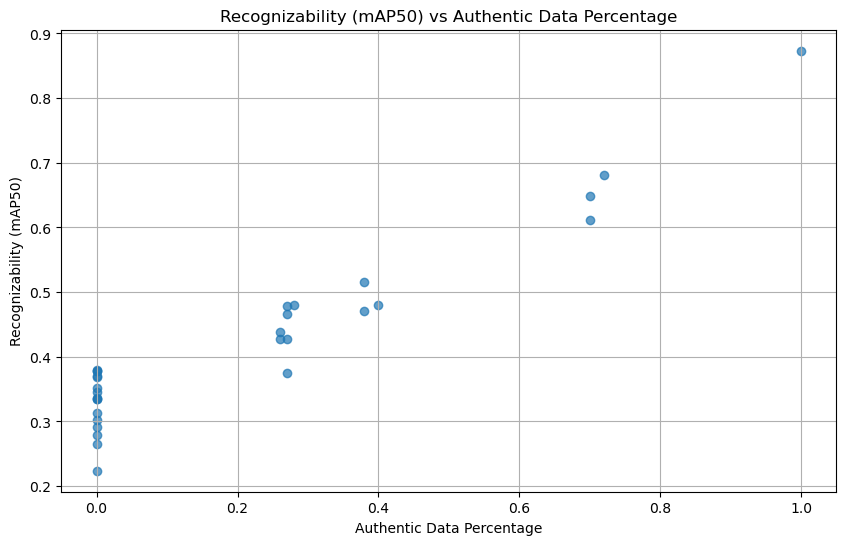

In [ ]:
# Plot map50 vs authentic data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["authentic_pct"], merged_df["map50"], alpha=0.7)
plt.title("Recognizability (mAP50) vs Authentic Data Percentage")
plt.xlabel("Authentic Data Percentage")
plt.ylabel("Recognizability (mAP50)")
plt.grid()
plt.show()

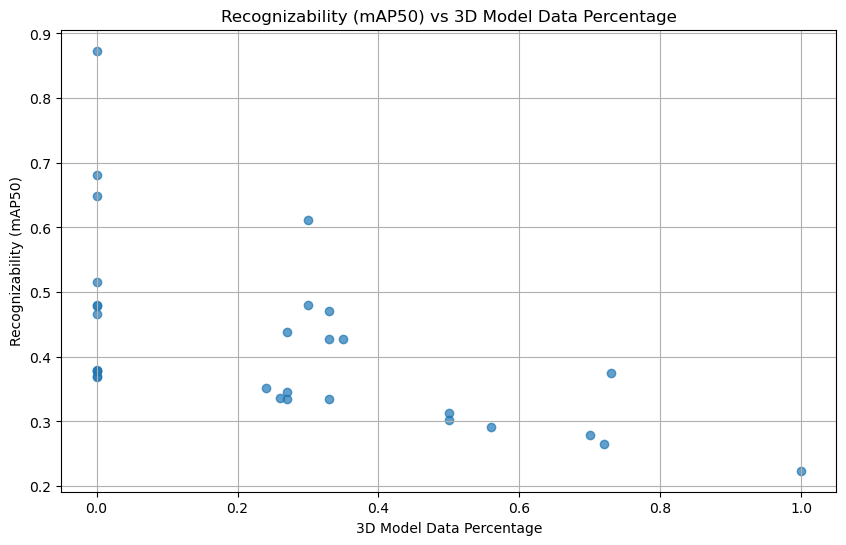

In [56]:
# Plot map50 vs 3d model data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["3d_model_pct"], merged_df["map50"], alpha=0.7)
plt.title("Recognizability (mAP50) vs 3D Model Data Percentage")
plt.xlabel("3D Model Data Percentage")
plt.ylabel("Recognizability (mAP50)")
plt.grid()
plt.show()

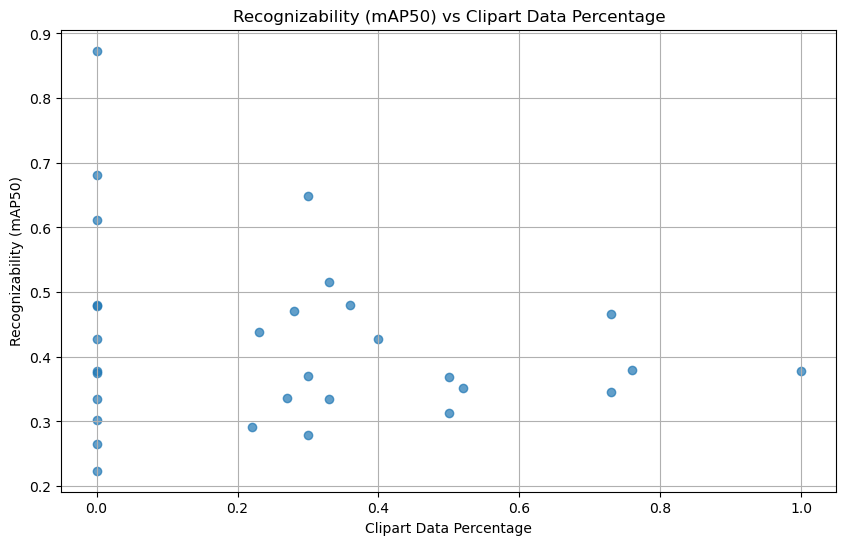

In [57]:
# Plot map50 vs clipart data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["clipart_pct"], merged_df["map50"], alpha=0.7)
plt.title("Recognizability (mAP50) vs Clipart Data Percentage")
plt.xlabel("Clipart Data Percentage")
plt.ylabel("Recognizability (mAP50)")
plt.grid()
plt.show()

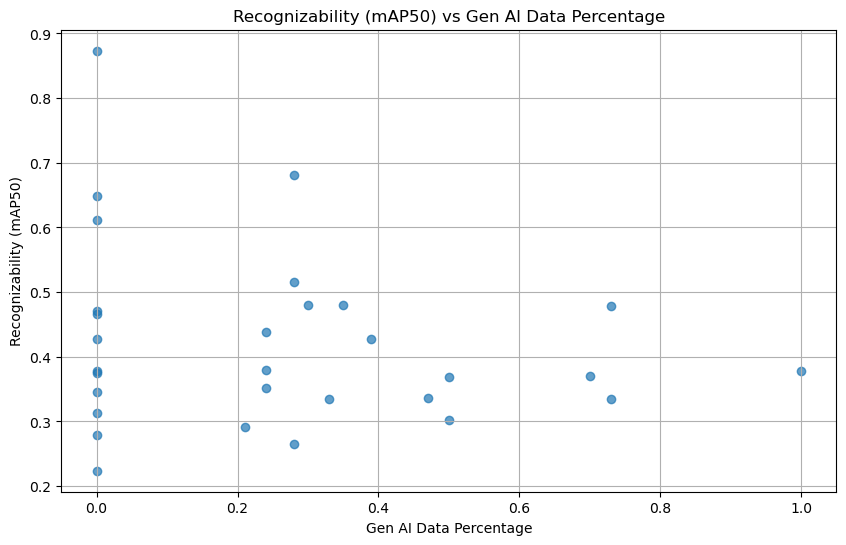

In [58]:
# Plot map50 vs genai data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["genai_pct"], merged_df["map50"], alpha=0.7)
plt.title("Recognizability (mAP50) vs Gen AI Data Percentage")
plt.xlabel("Gen AI Data Percentage")
plt.ylabel("Recognizability (mAP50)")
plt.grid()
plt.show()

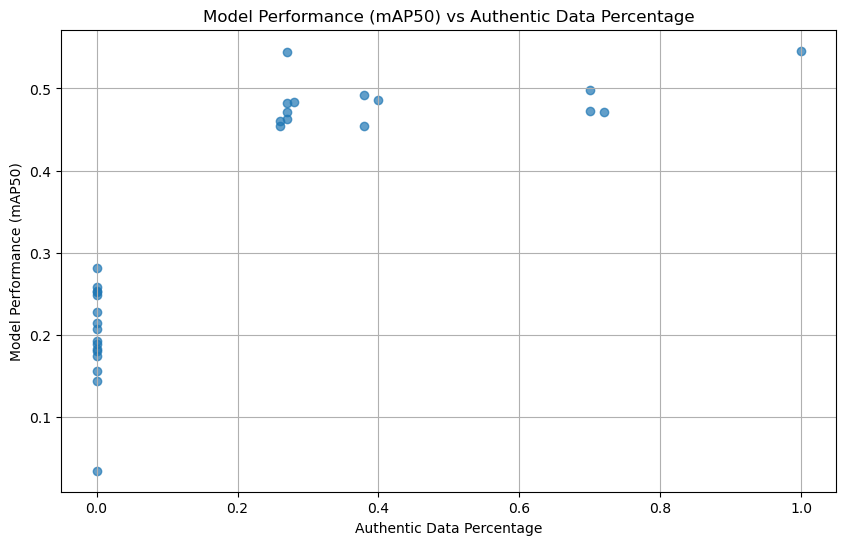

In [59]:
# Plot test map50 vs authentic data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["authentic_pct"], merged_df["test_map50"], alpha=0.7)
plt.title("Model Performance (mAP50) vs Authentic Data Percentage")
plt.xlabel("Authentic Data Percentage")
plt.ylabel("Model Performance (mAP50)")
plt.grid()
plt.show()

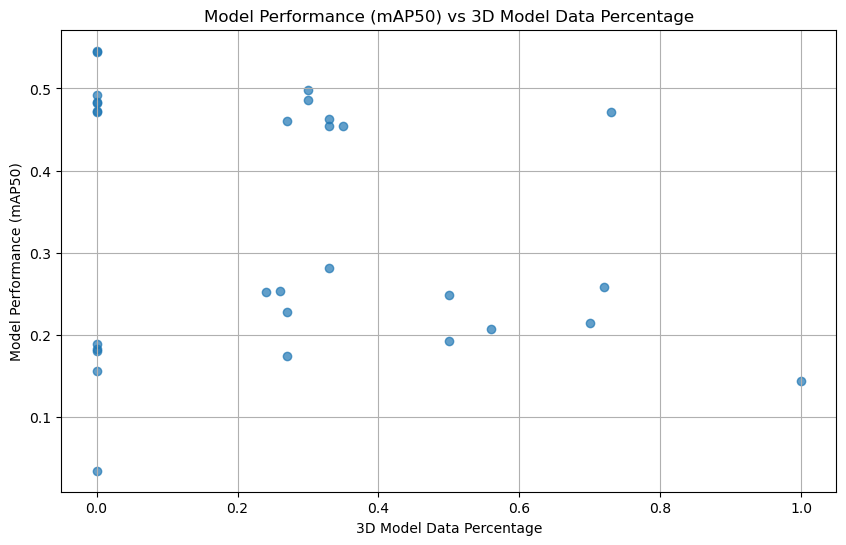

In [60]:
# Plot test map50 vs 3d model data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["3d_model_pct"], merged_df["test_map50"], alpha=0.7)
plt.title("Model Performance (mAP50) vs 3D Model Data Percentage")
plt.xlabel("3D Model Data Percentage")
plt.ylabel("Model Performance (mAP50)")
plt.grid()
plt.show()

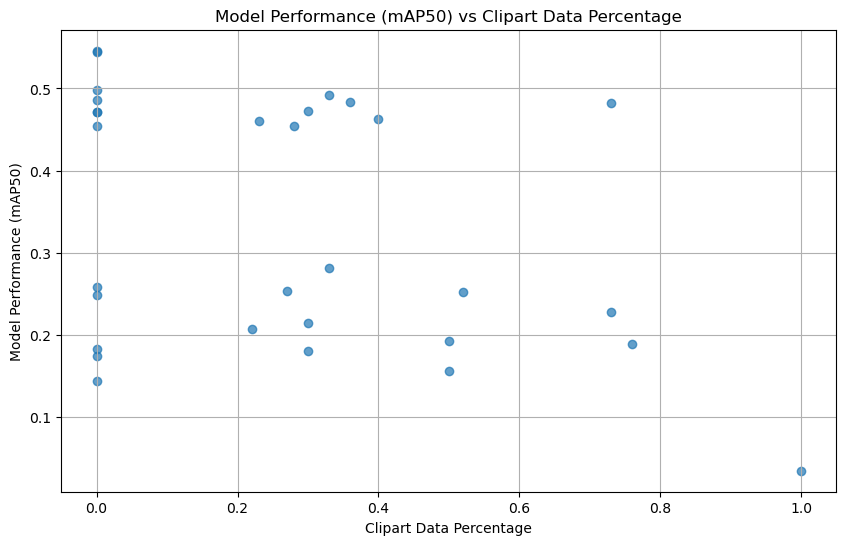

In [61]:
# Plot test map50 vs clipart data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["clipart_pct"], merged_df["test_map50"], alpha=0.7)
plt.title("Model Performance (mAP50) vs Clipart Data Percentage")
plt.xlabel("Clipart Data Percentage")
plt.ylabel("Model Performance (mAP50)")
plt.grid()
plt.show()

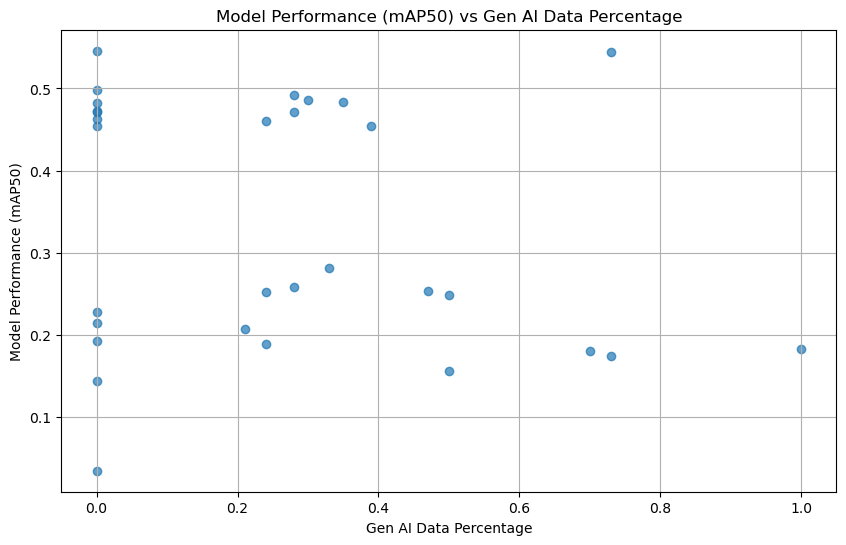

In [62]:
# Plot test map50 vs genai data percentage
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["genai_pct"], merged_df["test_map50"], alpha=0.7)
plt.title("Model Performance (mAP50) vs Gen AI Data Percentage")
plt.xlabel("Gen AI Data Percentage")
plt.ylabel("Model Performance (mAP50)")
plt.grid()
plt.show()